**IMPORTING LIBRARIES**

In [1]:
pip install jcopml

  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=7932c97d2834a7a9d327a1c170b0b51f1475db5daed2f461117c436e4c6e459b
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
  Created wheel for pyperclip: filename=pyperclip-1.9.0-py3-none-any.whl size=11002 sha256=7fb01301248642020eef8adeee838231f8d38d2e146fcc94ab10b041fe0a7b49
  Stored in directory: /root/.cache/pip/wheels/cc/ae/36/ee17d1de094fcb61e24106cb329b5103861e819f94bef5e10a
Successfully built jcopml pyperclip
Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
from jcopml.plot import plot_missing_value
import warnings
warnings.filterwarnings("ignore")

# Reading the Data

In [3]:
raw_data = pd.read_csv("/kaggle/input/rfmanalysis/RFM Analysis.csv")
raw_data


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2/25/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,5/21/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,10/16/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,8/31/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,10/1/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,6/24/2017,True,Approved,OHM Cycles,Standard,high,medium,2005.66,"$1,203.40",37823.0
19996,19997,41,127,11/9/2017,True,Approved,Solex,Road,medium,medium,416.98,$312.74,35560.0
19997,19998,87,2284,4/14/2017,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,$44.71,40410.0
19998,19999,6,2764,7/3/2017,False,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,38216.0


# Plotting the Missing Data

,missing_value,%
transaction_id,0,0.00
product_id,0,0.00
customer_id,0,0.00
transaction_date,0,0.00
online_order,360,1.80
order_status,0,0.00
brand,197,0.98
product_line,197,0.98
product_class,197,0.98
product_size,197,0.98


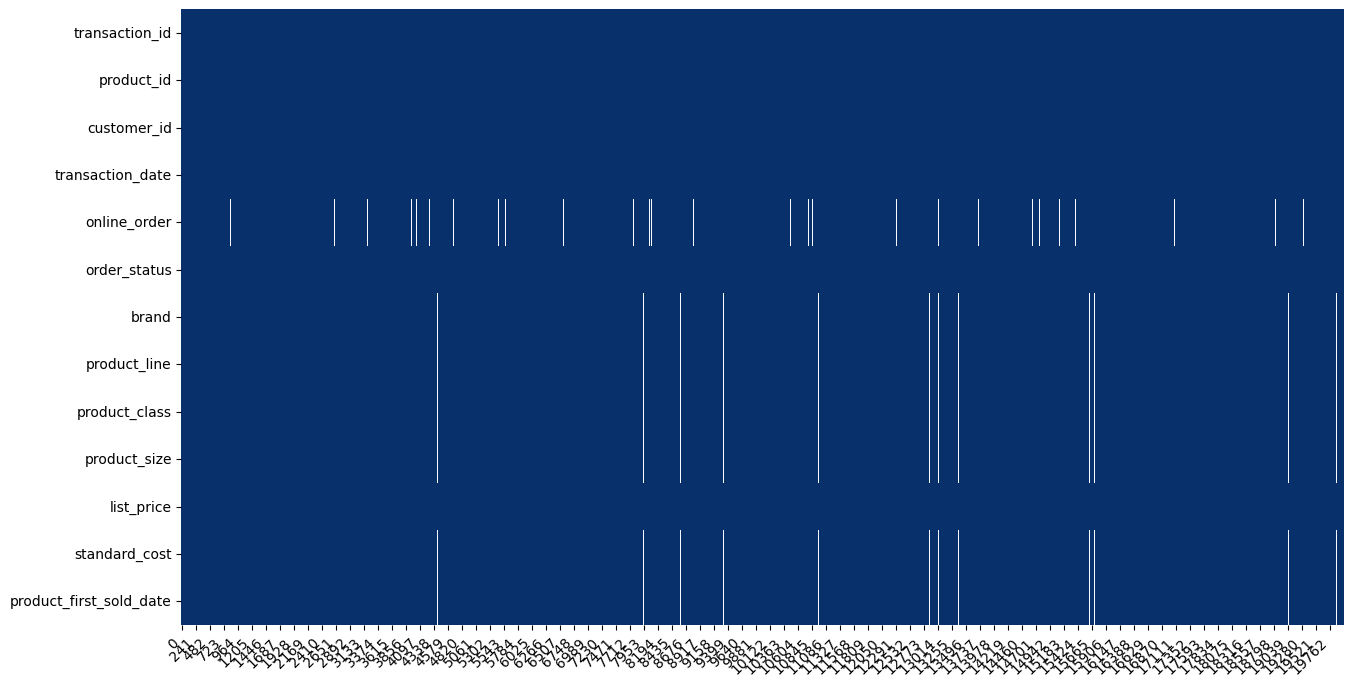

In [4]:
plot_missing_value(raw_data, return_df = True)

# Statistical Summary of the Dataset

In [5]:
raw_data.describe()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,38199.776549
std,5773.647028,30.75359,1011.951046,582.825242,2875.201110
min,1.000000,0.00000,1.000000,12.010000,33259.000000
25%,5000.750000,18.00000,857.750000,575.270000,35667.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,38216.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,42710.000000


> This step converts the transaction_date column to a datetime format for proper date handling. Then, it identifies the most recent transaction date in the dataset by calculating the maximum value in the transaction_date column.

> The result (most_recent) is the latest transaction date, which can be used for time-based analyses, such as calculating recency in RFM analysis.

In [6]:
raw_data['transaction_date'] = pd.to_datetime(raw_data['transaction_date'])
most_recent = raw_data['transaction_date'].max()
most_recent 

Timestamp('2017-12-30 00:00:00')

In [7]:
reference_date = pd.Timestamp('2017-12-30') 

In [8]:
data_prepared = raw_data[['transaction_id', 'customer_id', 'transaction_date', 'list_price']]
data_prepared

,transaction_id,customer_id,transaction_date,list_price
0,1,2950,2017-02-25,71.49
1,2,3120,2017-05-21,2091.47
2,3,402,2017-10-16,1793.43
3,4,3135,2017-08-31,1198.46
4,5,787,2017-10-01,1765.30
...,...,...,...,...
19995,19996,1018,2017-06-24,2005.66
19996,19997,127,2017-11-09,416.98
19997,19998,2284,2017-04-14,1636.90
19998,19999,2764,2017-07-03,227.88


> 
This step calculates the **most recent transaction date** for each customer by grouping the data by `customer_id` and finding the maximum `transaction_date`. The result (`recency_data`) is a DataFrame containing each customer's ID and their latest transaction date, which is crucial for calculating **recency** in RFM analysis.

In [9]:
recency_data = data_prepared.groupby('customer_id')['transaction_date'].max().reset_index()
recency_data

,customer_id,transaction_date
0,1,2017-12-23
1,2,2017-08-24
2,3,2017-09-19
3,4,2017-06-18
4,5,2017-12-14
...,...,...
3489,3497,2017-11-08
3490,3498,2017-08-25
3491,3499,2017-11-09
3492,3500,2017-08-08


> This step calculates the recency for each customer by subtracting their most recent transaction date (transaction_date) from a given reference_date. The result is expressed in days (.dt.days) and added as a new column (recency) to the recency_data DataFrame. This helps measure how long it has been since each customer's last purchase, a key component of RFM analysis.

In [10]:
recency_data['recency'] = (reference_date -  recency_data['transaction_date']).dt.days
recency_data

,customer_id,transaction_date,recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,3,2017-09-19,102
3,4,2017-06-18,195
4,5,2017-12-14,16
...,...,...,...
3489,3497,2017-11-08,52
3490,3498,2017-08-25,127
3491,3499,2017-11-09,51
3492,3500,2017-08-08,144


In [11]:

data_prepared = data_prepared.merge(recency_data[['customer_id', 'recency']], on ='customer_id', how = 'left')
data_prepared = data_prepared.drop(columns=['recency_x', 'recency_y'], errors='ignore')
data_prepared 

,transaction_id,customer_id,transaction_date,list_price,recency
0,1,2950,2017-02-25,71.49,75
1,2,3120,2017-05-21,2091.47,20
2,3,402,2017-10-16,1793.43,56
3,4,3135,2017-08-31,1198.46,121
4,5,787,2017-10-01,1765.30,75
...,...,...,...,...,...
19995,19996,1018,2017-06-24,2005.66,26
19996,19997,127,2017-11-09,416.98,23
19997,19998,2284,2017-04-14,1636.90,34
19998,19999,2764,2017-07-03,227.88,51


> This step calculates the frequency of transactions for each customer by grouping the data by customer_id and counting the number of transaction_id entries. The resulting DataFrame (frequency_data) contains each customer's ID and their total transaction count. The column is renamed to frequency for clarity, which is essential for the frequency component of RFM analysis.

In [12]:
print(data_prepared.columns)

frequency_data = data_prepared.groupby('customer_id')['transaction_id'].count().reset_index()
frequency_data.rename(columns={'transaction_id': 'frequency'}, inplace=True)

data_prepared = data_prepared.merge(frequency_data[['customer_id', 'frequency']], on='customer_id', how='left')


data_prepared


Index(['transaction_id', 'customer_id', 'transaction_date', 'list_price',
       'recency'],
      dtype='object')


,transaction_id,customer_id,transaction_date,list_price,recency,frequency
0,1,2950,2017-02-25,71.49,75,3
1,2,3120,2017-05-21,2091.47,20,7
2,3,402,2017-10-16,1793.43,56,6
3,4,3135,2017-08-31,1198.46,121,7
4,5,787,2017-10-01,1765.30,75,10
...,...,...,...,...,...,...
19995,19996,1018,2017-06-24,2005.66,26,5
19996,19997,127,2017-11-09,416.98,23,10
19997,19998,2284,2017-04-14,1636.90,34,7
19998,19999,2764,2017-07-03,227.88,51,4


In [13]:
count_max_freq = data_prepared['frequency'].max()

In [14]:
count_max_freq 

14

> This step calculates the monetary value for each customer by grouping the data by customer_id and summing the list_price (likely the total amount spent by each customer). The result (monetary_data) is a DataFrame containing each customer's ID and their total monetary spend.



In [15]:
monetary_data = data_prepared.groupby('customer_id')['list_price'].sum().reset_index()
data_prepared = data_prepared.merge(monetary_data[['customer_id', 'list_price']], on = 'customer_id', how ='left')
data_prepared

,transaction_id,customer_id,transaction_date,list_price_x,recency,frequency,list_price_y
0,1,2950,2017-02-25,71.49,75,3,1953.15
1,2,3120,2017-05-21,2091.47,20,7,7351.70
2,3,402,2017-10-16,1793.43,56,6,8148.22
3,4,3135,2017-08-31,1198.46,121,7,7539.81
4,5,787,2017-10-01,1765.30,75,10,11292.54
...,...,...,...,...,...,...,...
19995,19996,1018,2017-06-24,2005.66,26,5,6164.88
19996,19997,127,2017-11-09,416.98,23,10,9949.62
19997,19998,2284,2017-04-14,1636.90,34,7,7556.94
19998,19999,2764,2017-07-03,227.88,51,4,3651.92


In [16]:
data_prepared.rename(columns = {'list_price_y': 'monetary'}, inplace =True)

In [17]:
data_prepared

,transaction_id,customer_id,transaction_date,list_price_x,recency,frequency,monetary
0,1,2950,2017-02-25,71.49,75,3,1953.15
1,2,3120,2017-05-21,2091.47,20,7,7351.70
2,3,402,2017-10-16,1793.43,56,6,8148.22
3,4,3135,2017-08-31,1198.46,121,7,7539.81
4,5,787,2017-10-01,1765.30,75,10,11292.54
...,...,...,...,...,...,...,...
19995,19996,1018,2017-06-24,2005.66,26,5,6164.88
19996,19997,127,2017-11-09,416.98,23,10,9949.62
19997,19998,2284,2017-04-14,1636.90,34,7,7556.94
19998,19999,2764,2017-07-03,227.88,51,4,3651.92


In [18]:
data_prepared.rename(columns = {'list_price_x': 'list_price'}, inplace =True)
data_prepared

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary
0,1,2950,2017-02-25,71.49,75,3,1953.15
1,2,3120,2017-05-21,2091.47,20,7,7351.70
2,3,402,2017-10-16,1793.43,56,6,8148.22
3,4,3135,2017-08-31,1198.46,121,7,7539.81
4,5,787,2017-10-01,1765.30,75,10,11292.54
...,...,...,...,...,...,...,...
19995,19996,1018,2017-06-24,2005.66,26,5,6164.88
19996,19997,127,2017-11-09,416.98,23,10,9949.62
19997,19998,2284,2017-04-14,1636.90,34,7,7556.94
19998,19999,2764,2017-07-03,227.88,51,4,3651.92


In [19]:
data_prepared.describe()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary
count,20000.000000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,1738.246050,2017-07-01 14:08:05.280000,1107.829449,51.959150,6.668900,7385.625404
min,1.000000,1.000000,2017-01-01 00:00:00,12.010000,0.000000,1.000000,60.340000
25%,5000.750000,857.750000,2017-04-01 00:00:00,575.270000,15.000000,5.000000,5178.380000
50%,10000.500000,1736.000000,2017-07-03 00:00:00,1163.890000,38.000000,7.000000,7091.730000
75%,15000.250000,2613.000000,2017-10-02 00:00:00,1635.300000,74.000000,8.000000,9279.010000
max,20000.000000,5034.000000,2017-12-30 00:00:00,2091.470000,353.000000,14.000000,19071.320000
std,5773.647028,1011.951046,NaN,582.825242,49.267211,2.333762,3021.012719


> this step creates a histogram to visualize the distribution of purchase frequency across these customers

In [20]:
data_prepared[data_prepared['frequency']> 0]
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary
0,1,2950,2017-02-25,71.49,75,3,1953.15
1,2,3120,2017-05-21,2091.47,20,7,7351.70
2,3,402,2017-10-16,1793.43,56,6,8148.22
3,4,3135,2017-08-31,1198.46,121,7,7539.81
4,5,787,2017-10-01,1765.30,75,10,11292.54


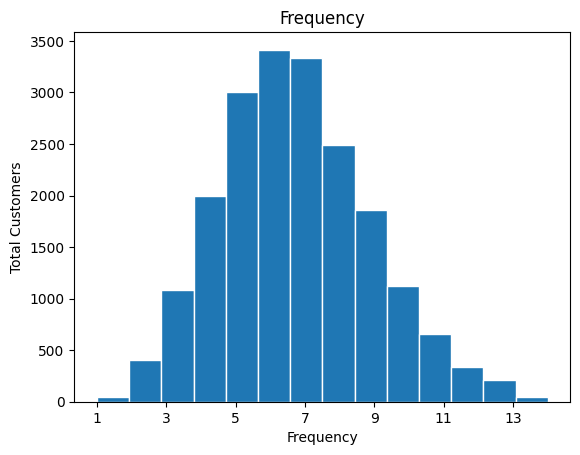

In [21]:
plt.hist(data_prepared['frequency'], bins = 14, edgecolor = 'white', range=(1, 14))
plt.title('Frequency')

plt.ylabel('Total Customers')
plt.xlabel('Frequency')
plt.xticks(range(1, 14, 2))
plt.show();


> This step creates a histogram to visualize the distribution of monetary values (total amount spent) for customers.

In [22]:
data_prepared[data_prepared['monetary']< 7000]
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary
0,1,2950,2017-02-25,71.49,75,3,1953.15
1,2,3120,2017-05-21,2091.47,20,7,7351.70
2,3,402,2017-10-16,1793.43,56,6,8148.22
3,4,3135,2017-08-31,1198.46,121,7,7539.81
4,5,787,2017-10-01,1765.30,75,10,11292.54


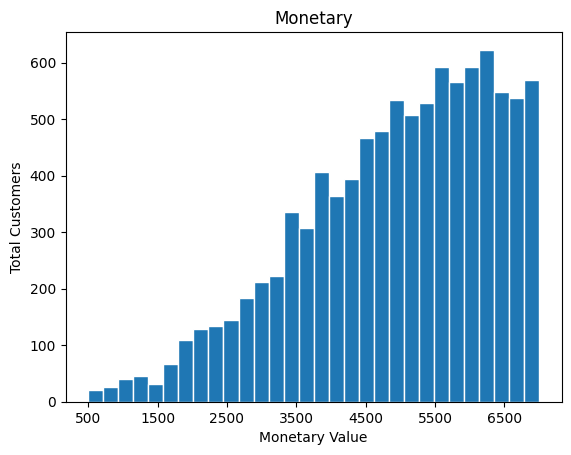

In [23]:
plt.hist(data_prepared['monetary'], bins=30, edgecolor='white', range=(500, 7000))  # Specify range and bins
plt.title('Monetary')  
plt.ylabel('Total Customers')
plt.xlabel('Monetary Value')  
plt.xticks(range(500, 7001, 1000))  
plt.show()


> This histogram helps to analyze the recency of customer behavior, revealing how many customers have recently made purchases and identifying potential groups for re-engagement or marketing campaigns.

In [24]:
data_prepared[data_prepared['recency']< 10]
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary
0,1,2950,2017-02-25,71.49,75,3,1953.15
1,2,3120,2017-05-21,2091.47,20,7,7351.70
2,3,402,2017-10-16,1793.43,56,6,8148.22
3,4,3135,2017-08-31,1198.46,121,7,7539.81
4,5,787,2017-10-01,1765.30,75,10,11292.54


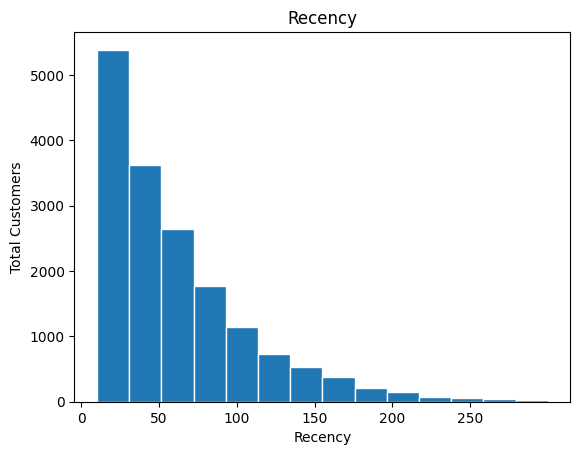

In [25]:
plt.hist(data_prepared['recency'], bins=14, edgecolor='white', range=(10, 300))  
plt.title('Recency')
plt.ylabel('Total Customers')
plt.xlabel('Recency')
plt.xticks(range(0, 300, 50))  
plt.show()

# Calaculating for Score RFM Components (Recency, Frequency, and Monetary)

In [26]:
quartiles = data_prepared.quantile(q= [0.25, 0.50, 0.75])
quartiles

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary
0.25,5000.75,857.75,2017-04-01,575.27,15.0,5.0,5178.38
0.50,10000.50,1736.00,2017-07-03,1163.89,38.0,7.0,7091.73
0.75,15000.25,2613.00,2017-10-02,1635.30,74.0,8.0,9279.01


In [27]:
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary
0,1,2950,2017-02-25,71.49,75,3,1953.15
1,2,3120,2017-05-21,2091.47,20,7,7351.70
2,3,402,2017-10-16,1793.43,56,6,8148.22
3,4,3135,2017-08-31,1198.46,121,7,7539.81
4,5,787,2017-10-01,1765.30,75,10,11292.54


In [28]:
def recency_score(data):
    if data <= 15:
        return 1
    elif data <= 38:
        return 2
    elif data <= 74:
        return 3
    else:
        return 4


def frequency_score(data):
    if data <= 5:
        return 1
    elif data <= 7:
        return 2
    elif data <= 8:
        return 3
    else:
        return 4

def monetary_score(data):
    if data <= 5178.38:
        return 1
    elif data <= 7091.73:
        return 2
    elif data <= 9279.01:
        return 3
    else:
        return 4


data_prepared['R']= data_prepared['recency'].apply(recency_score)
data_prepared['F']= data_prepared['frequency'].apply(frequency_score)
data_prepared['M']= data_prepared['monetary'].apply(monetary_score)
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary,R,F,M
0,1,2950,2017-02-25,71.49,75,3,1953.15,4,1,1
1,2,3120,2017-05-21,2091.47,20,7,7351.70,2,2,3
2,3,402,2017-10-16,1793.43,56,6,8148.22,3,2,3
3,4,3135,2017-08-31,1198.46,121,7,7539.81,4,2,3
4,5,787,2017-10-01,1765.30,75,10,11292.54,4,4,4


In [29]:
data_prepared['RFM Score'] = data_prepared[['R', 'F', 'M']].sum(axis= 1)
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary,R,F,M,RFM Score
0,1,2950,2017-02-25,71.49,75,3,1953.15,4,1,1,6
1,2,3120,2017-05-21,2091.47,20,7,7351.70,2,2,3,7
2,3,402,2017-10-16,1793.43,56,6,8148.22,3,2,3,8
3,4,3135,2017-08-31,1198.46,121,7,7539.81,4,2,3,9
4,5,787,2017-10-01,1765.30,75,10,11292.54,4,4,4,12


**Manually Semgenting Customers**

> This step assigns a customer label based on their RFM Score (a combined score of Recency, Frequency, and Monetary). The labels represent different levels of customer value:

* Bronze: Default label for customers with an RFM score ≤ 4.
* Silver: Assigned to customers with an RFM score greater than 4.
* Gold: Assigned to customers with an RFM score greater than 6.
* Platinum: Assigned to customers with an RFM score greater than 8.
* Diamond: Assigned to customers with an RFM score greater than 10.

In [30]:
data_prepared['label'] = 'Bronze'
data_prepared.loc[data_prepared['RFM Score'] > 4 , 'label']= 'Silver'
data_prepared.loc[data_prepared['RFM Score'] > 6, 'label'] = 'Gold'
data_prepared.loc[data_prepared['RFM Score'] > 8, 'label'] = 'Platinum'
data_prepared.loc[data_prepared['RFM Score'] > 10, 'label'] = 'Diamond'
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary,R,F,M,RFM Score,label
0,1,2950,2017-02-25,71.49,75,3,1953.15,4,1,1,6,Silver
1,2,3120,2017-05-21,2091.47,20,7,7351.70,2,2,3,7,Gold
2,3,402,2017-10-16,1793.43,56,6,8148.22,3,2,3,8,Gold
3,4,3135,2017-08-31,1198.46,121,7,7539.81,4,2,3,9,Platinum
4,5,787,2017-10-01,1765.30,75,10,11292.54,4,4,4,12,Diamond


> Plotting the Customer Segmentation in Hisogram

  Silver  Gold  Platinum  Bronze  Diamond
    6118  5630      4906    2152     1194


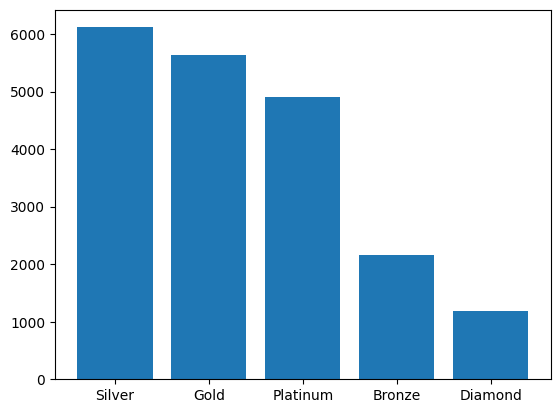

In [31]:
barplot = dict(data_prepared['label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))

# K-Means Clustering for Customer Segmentation

> This step uses the Elbow Method to determine the optimal number of clusters for K-Means clustering in customer segmentation.

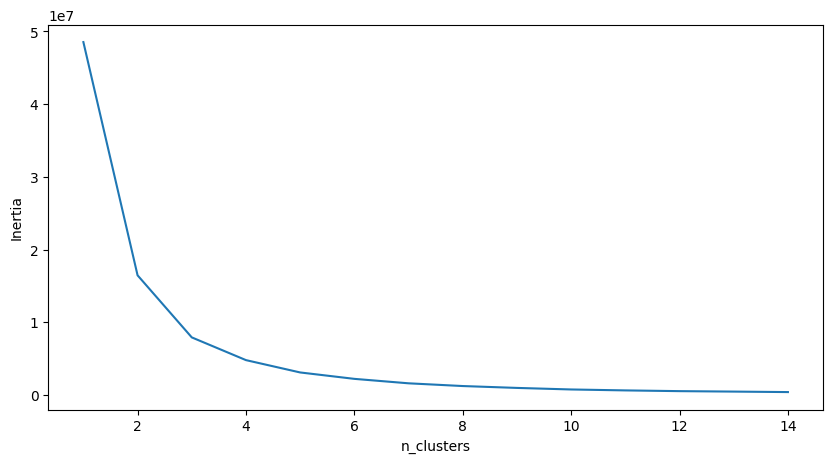

In [32]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(data_prepared['recency']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters");

> This step applies K-Means clustering to segment customers based on their recency (the number of days since their last purchase).

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_prepared[['recency']])
data_prepared['RecencyCluster'] = kmeans.predict(data_prepared[['recency']])
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary,R,F,M,RFM Score,label,RecencyCluster
0,1,2950,2017-02-25,71.49,75,3,1953.15,4,1,1,6,Silver,2
1,2,3120,2017-05-21,2091.47,20,7,7351.70,2,2,3,7,Gold,0
2,3,402,2017-10-16,1793.43,56,6,8148.22,3,2,3,8,Gold,2
3,4,3135,2017-08-31,1198.46,121,7,7539.81,4,2,3,9,Platinum,1
4,5,787,2017-10-01,1765.30,75,10,11292.54,4,4,4,12,Diamond,2


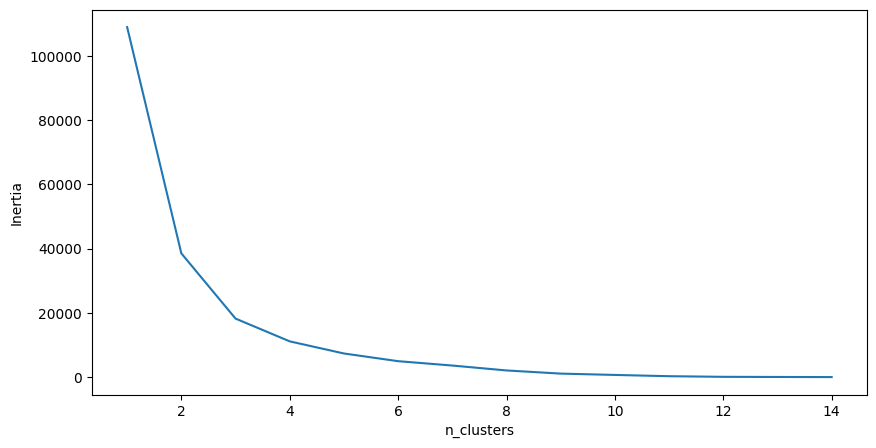

In [34]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(data_prepared['frequency']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters");

> This step applies K-Means clustering to segment customers based on their frequency (the number of purchases they have made).

In [35]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_prepared[['frequency']])
data_prepared['FrequencyCluster'] = kmeans.predict(data_prepared[['frequency']])
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary,R,F,M,RFM Score,label,RecencyCluster,FrequencyCluster
0,1,2950,2017-02-25,71.49,75,3,1953.15,4,1,1,6,Silver,2,3
1,2,3120,2017-05-21,2091.47,20,7,7351.70,2,2,3,7,Gold,0,2
2,3,402,2017-10-16,1793.43,56,6,8148.22,3,2,3,8,Gold,2,1
3,4,3135,2017-08-31,1198.46,121,7,7539.81,4,2,3,9,Platinum,1,2
4,5,787,2017-10-01,1765.30,75,10,11292.54,4,4,4,12,Diamond,2,0


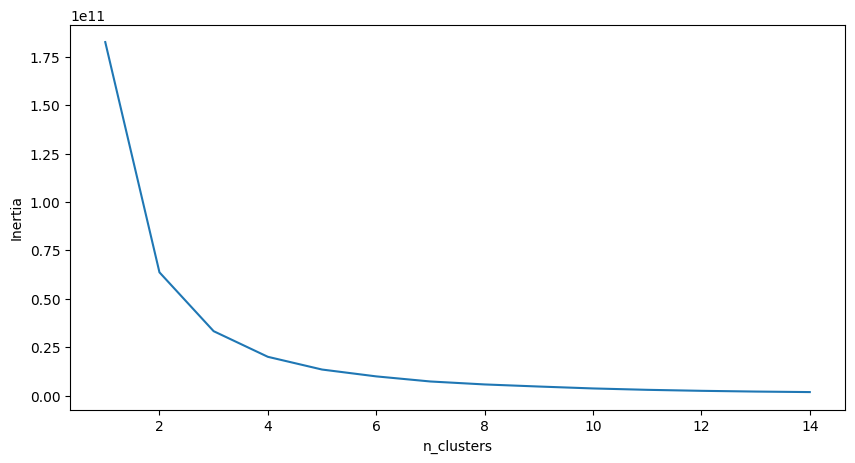

In [36]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(data_prepared['monetary']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters");

> This step applies K-Means clustering to segment customers based on their monetary value (the total amount spent).

In [37]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_prepared[['monetary']])
data_prepared['MonetaryCluster'] = kmeans.predict(data_prepared[['monetary']])
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary,R,F,M,RFM Score,label,RecencyCluster,FrequencyCluster,MonetaryCluster
0,1,2950,2017-02-25,71.49,75,3,1953.15,4,1,1,6,Silver,2,3,2
1,2,3120,2017-05-21,2091.47,20,7,7351.70,2,2,3,7,Gold,0,2,1
2,3,402,2017-10-16,1793.43,56,6,8148.22,3,2,3,8,Gold,2,1,3
3,4,3135,2017-08-31,1198.46,121,7,7539.81,4,2,3,9,Platinum,1,2,1
4,5,787,2017-10-01,1765.30,75,10,11292.54,4,4,4,12,Diamond,2,0,0


In [38]:
data_prepared['RFM C Score'] = data_prepared['RecencyCluster'] +  data_prepared['FrequencyCluster'] +  data_prepared['MonetaryCluster']
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary,R,F,M,RFM Score,label,RecencyCluster,FrequencyCluster,MonetaryCluster,RFM C Score
0,1,2950,2017-02-25,71.49,75,3,1953.15,4,1,1,6,Silver,2,3,2,7
1,2,3120,2017-05-21,2091.47,20,7,7351.70,2,2,3,7,Gold,0,2,1,3
2,3,402,2017-10-16,1793.43,56,6,8148.22,3,2,3,8,Gold,2,1,3,6
3,4,3135,2017-08-31,1198.46,121,7,7539.81,4,2,3,9,Platinum,1,2,1,4
4,5,787,2017-10-01,1765.30,75,10,11292.54,4,4,4,12,Diamond,2,0,0,2


In [39]:
data_prepared['RFM C Score'].unique()

array([7, 3, 6, 4, 2, 5, 8, 0, 1], dtype=int32)

> This step calculates the average values of recency, frequency, and monetary for each RFM C Score group.

In [40]:
data_prepared.groupby('RFM C Score')[['recency', 'frequency', 'monetary']].mean()


,recency,frequency,monetary
RFM C Score,,,
0,16.380296,11.275862,13470.842502
1,74.563218,9.850575,10774.092759
2,21.904674,6.956973,8564.735638
3,37.915880,7.076031,6812.040758
4,61.544592,5.970019,6812.197605
5,41.878181,6.703593,7202.164089
6,105.192431,5.139833,5921.015221
7,66.010617,6.092691,7112.441049
8,207.041502,3.134387,3276.944625


> 

> Segmenting the Customers Based on the Customers Score

In [41]:
data_prepared['C_label'] = 'Bronze'
data_prepared.loc[data_prepared['RFM C Score'] >2  , 'C_label']= 'Silver'
data_prepared.loc[data_prepared['RFM C Score'] >4 , 'C_label'] = 'Gold'
data_prepared.loc[data_prepared['RFM C Score'] >6 , 'C_label'] = 'Platinum'
data_prepared.loc[data_prepared['RFM C Score'] >8 , 'C_label'] = 'Diamond'
data_prepared.head()

,transaction_id,customer_id,transaction_date,list_price,recency,frequency,monetary,R,F,M,RFM Score,label,RecencyCluster,FrequencyCluster,MonetaryCluster,RFM C Score,C_label
0,1,2950,2017-02-25,71.49,75,3,1953.15,4,1,1,6,Silver,2,3,2,7,Platinum
1,2,3120,2017-05-21,2091.47,20,7,7351.70,2,2,3,7,Gold,0,2,1,3,Silver
2,3,402,2017-10-16,1793.43,56,6,8148.22,3,2,3,8,Gold,2,1,3,6,Gold
3,4,3135,2017-08-31,1198.46,121,7,7539.81,4,2,3,9,Platinum,1,2,1,4,Silver
4,5,787,2017-10-01,1765.30,75,10,11292.54,4,4,4,12,Diamond,2,0,0,2,Bronze


> Visualizing the Segments


  Gold  Silver  Bronze  Platinum
  6903    6344    3798      2955


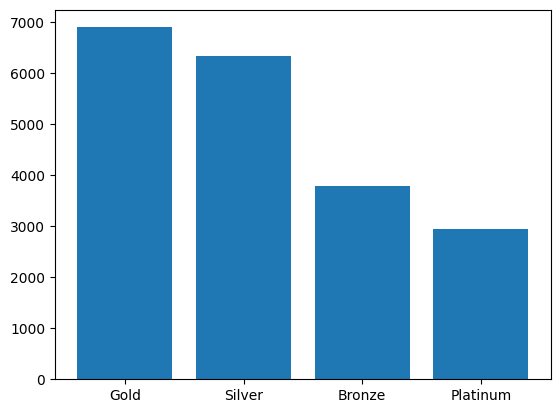

In [42]:
barplot = dict(data_prepared['C_label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))